# Exercício PA1-4

Exercício com data de entrega para 14 de outubro de 2020.


Aluno: Noé de Lima Bezerra

<noe_lima@id.uff.br>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math, Image
sp.init_printing(use_latex='mathjax',latex_mode='equation*')

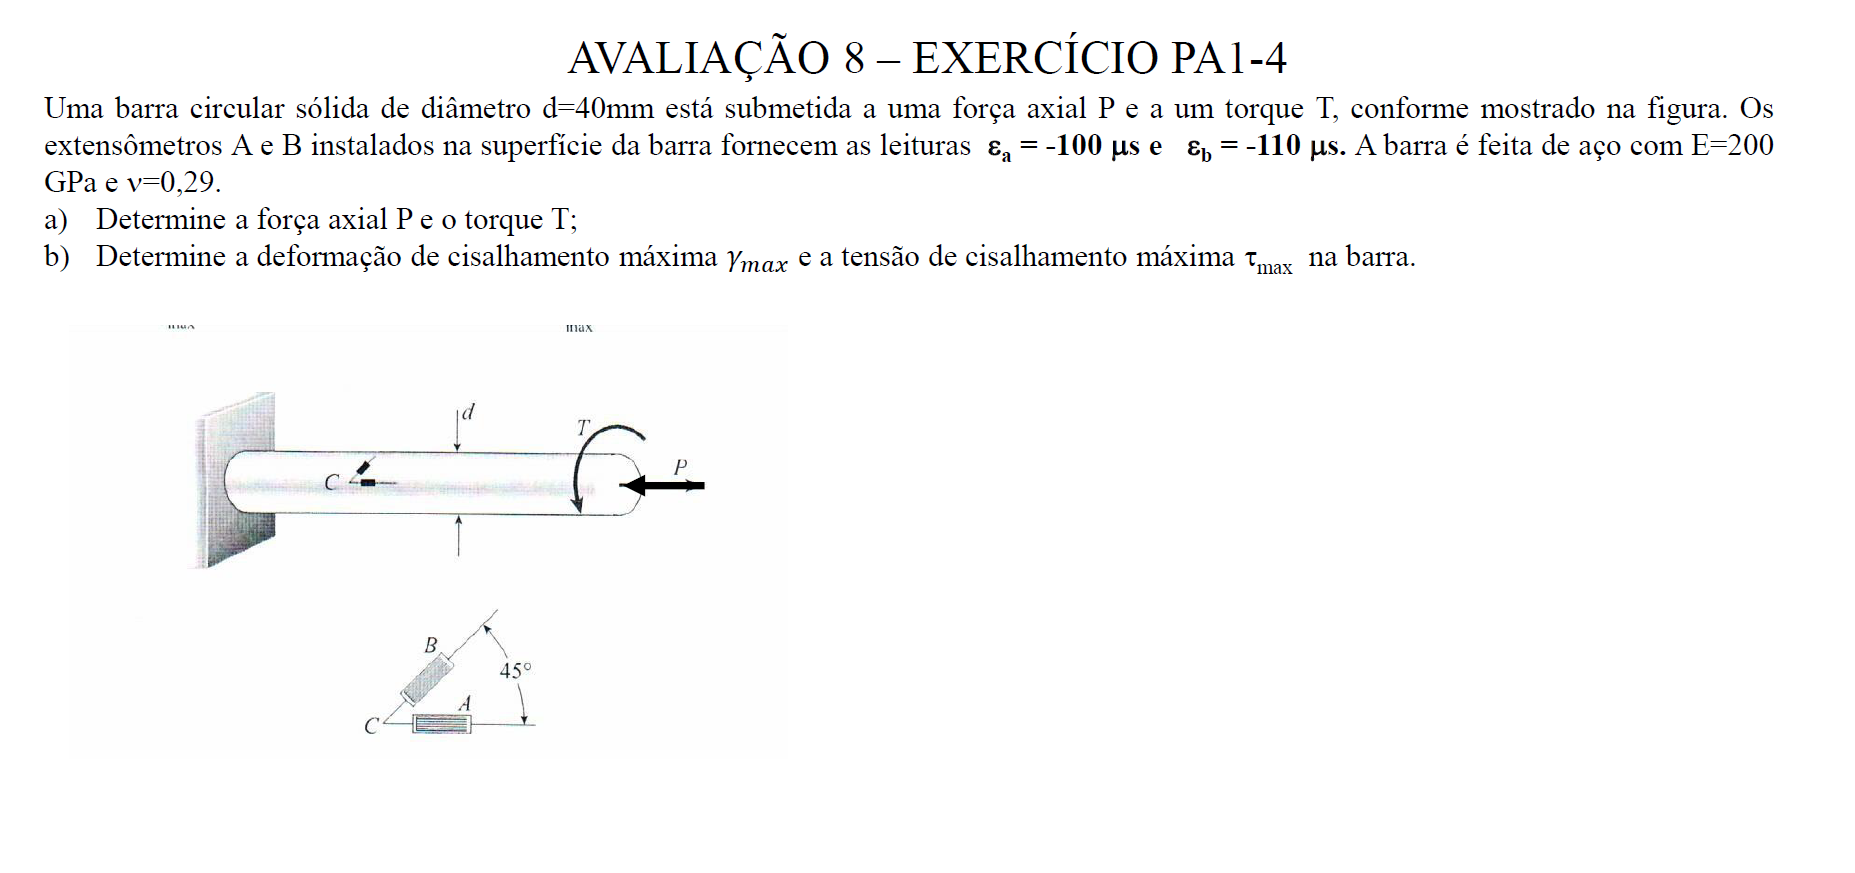

In [2]:
Image("Figuras/PA1-4.png")

# Solução

## Círculo de Mohr

In [3]:
def mohr(s_x,s_y,t_xy):
    if t_xy == 0:
        t_xy = 1e-10  # Evitar divisão por zero!
    z = np.linspace(0,360,360)
    r = np.sqrt((((s_x-s_y)/2)**2)+t_xy**2)
    s_med = ((s_x+s_y)/2)
    tg2tc = -(s_x-s_y)/(2*t_xy)
    tg2tp = -1/(tg2tc)
    tc = np.degrees(np.arctan(tg2tc)/2)
    tp = np.degrees(np.arctan(tg2tp)/2)
    x = s_med + r*np.cos(np.radians(z))
    y = r*np.sin(np.radians(z))
    a = ([s_x,s_x,s_y,s_y,s_x])
    b = ([0,t_xy,-t_xy,0,0])
    # Plot
    text = '\n'.join((
        r'$\sigma_{min} = %.1f~MPa$' % (s_med-r,),
        r'$\sigma_{max} = %.1f~MPa$' % (s_med+r,),
        r'$\tau_{max} = %.1f~MPa$' % (r,),
        r'$\theta_{p} = %.0f^{o}$' % (tp,),
        r'$\theta_{c} = %.0f^{o}$' % (tc,)
    ))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.plot(a,b,x,y)
    plt.xlabel(r"$\sigma$", size=18)
    plt.ylabel(r"$\tau$", size=18)
    plt.title("Círculo de Mohr para Tensões")
    plt.text(s_med-1.6*r,r,text, fontsize=12, verticalalignment='top', bbox=props)
    plt.axis("equal")
    plt.show()

In [4]:
def mohr_def(e_x,e_y,g_xy):
    if g_xy == 0:
        g_xy = 1e-10  # Evitar divisão por zero!
    z = np.linspace(0,360,360)
    r = np.sqrt((((e_x-e_y)/2)**2)+g_xy**2)
    e_med = ((e_x+e_y)/2)
    tg2tc = -(e_x-e_y)/(2*g_xy)
    tg2tp = -1/(tg2tc)
    tc = np.degrees(np.arctan(tg2tc)/2)
    tp = np.degrees(np.arctan(tg2tp)/2)
    x = e_med + r*np.cos(np.radians(z))
    y = r*np.sin(np.radians(z))
    a = ([e_x,e_x,e_y,e_y,e_x])
    b = ([0,g_xy,-g_xy,0,0])
    # Plot
    text = '\n'.join((
        r'$\epsilon_{min} = %.1f~\mu s$' % (e_med-r,),
        r'$\epsilon_{max} = %.1f~\mu s$' % (e_med+r,),
        r'$\frac{\gamma_{max}}{2} = %.1f~\mu s$' % (r,),
        r'$\theta_{p} = %.0f^{o}$' % (tp,),
        r'$\theta_{c} = %.0f^{o}$' % (tc,)
    ))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.plot(a,b,x,y)
    plt.xlabel(r"$\epsilon$", size=18)
    plt.ylabel(r"$\frac{\gamma}{2}$", size=18)
    plt.title("Círculo de Mohr para Deformações")
    plt.text(e_med-1.6*r,r,text, fontsize=12, verticalalignment='top', bbox=props)
    plt.axis("equal")
    plt.show()

## Deformações

Na seção que contém o ponto $C$, temos as seguintes deformações:

\begin{equation*}
    \left\{\begin{matrix}
        \epsilon_{a} & = & -100~\mu s \\
        \epsilon_{b} & = & -110~\mu s
    \end{matrix}\right.
\end{equation*}

In [5]:
mm,N,MPa = sp.symbols("mm,N,MPa")
kN = 1000*N
m = 1000*mm
GPa = 1e3*MPa

In [6]:
d = 40*mm
A = np.pi*(d**2)/4
J = np.pi*(d**4)/32
E = 200*GPa
nu = 0.29
G = E/(2*(1+nu))

## Equação de Deformação

Temos a seguinte função que relaciona a deformação ao ângulo em relação aos eixos locais #xy#:

\begin{equation*}
    \epsilon\left(\theta\right) = \frac{\epsilon_{x}+\epsilon_{y}}{2} + \frac{\epsilon_{x}-\epsilon_{y}}{2}\cos{\left(2\theta\right)} + \gamma_{xy}\sin{\left(2\theta\right)}
\end{equation*}

In [7]:
epsilon,theta,epsilon_x,epsilon_y,gamma_xy = sp.symbols('epsilon,theta,epsilon_x,epsilon_y,gamma_xy')

In [8]:
eqext = sp.Eq(epsilon,((epsilon_x+epsilon_y)/2) + ((epsilon_x-epsilon_y)/2)*sp.cos(2*theta) + (gamma_xy/2)*sp.sin(2*theta))
display(eqext)

    εₓ   ε_y   γ_xy⋅sin(2⋅θ)   ⎛εₓ   ε_y⎞         
ε = ── + ─── + ───────────── + ⎜── - ───⎟⋅cos(2⋅θ)
    2     2          2         ⎝2     2 ⎠         

## a)

In [9]:
display(eqext.subs(epsilon,-100e-6).subs(theta,0))
display(eqext.subs(epsilon,-110e-6).subs(theta,sp.pi/4))
display(eqext.subs(epsilon,(-100e-6)*(-nu)).subs(theta,sp.pi/2))

-0.0001 = εₓ

           εₓ   ε_y   γ_xy
-0.00011 = ── + ─── + ────
           2     2     2  

2.9e-5 = ε_y

In [10]:
eqgamma = eqext.subs(epsilon,-110e-6).subs(theta,sp.pi/4).subs(epsilon_x,-1e-4).subs(epsilon_y,2.9e-5)
display(eqgamma)
2*(-0.00011+3.55e-5)

           γ_xy          
-0.00011 = ──── - 3.55e-5
            2            

-0.000149

Assim, temos:

\begin{equation*}
    \left\{\begin{matrix}
        \epsilon_{x} & = & -100~\mu s \\
        \epsilon_{y} & = & 29~\mu s \\
        \gamma_{xy} & = & -149~\mu s
    \end{matrix}\right.
\end{equation*}

In [11]:
epsilon_x_c = -100e-6
epsilon_y_c = 29e-6
gamma_xy_c = -149e-6

In [12]:
sigma_x = E*epsilon_x_c
sigma_y = 0
tau_xy = G*gamma_xy_c
display(sigma_x,sigma_y,tau_xy)

-20.0⋅MPa

0

-11.5503875968992⋅MPa

In [13]:
P = A*sigma_x
display(P)
T = (J/(d/2))*tau_xy
display(T)

                        2
-25132.7412287183⋅MPa⋅mm 

                        3
-145146.451282133⋅MPa⋅mm 

Portanto,

\begin{equation*}
    \left\{\begin{matrix}
        P & = & -25,13~kN \\
        T & = & -145,15~kN\cdot mm
    \end{matrix}\right.
\end{equation*}

## b)

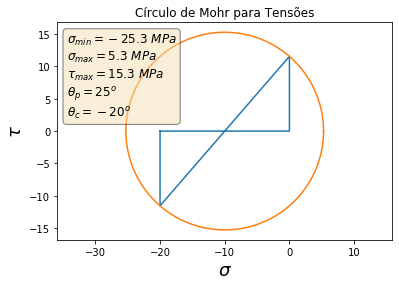

In [14]:
mohr(float(sigma_x.subs(MPa,1)),sigma_y,float(tau_xy.subs(MPa,1)))

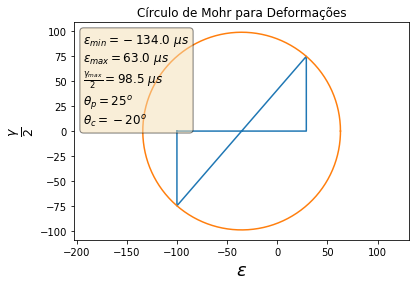

In [15]:
mohr_def(-100,29,-149/2)

In [16]:
(15.3*MPa)/G

0.000197370000000000

Assim, pelo círculo de Mohr, temos $\sigma_{min} = -25,3~MPa\lt 0$ e $\sigma_{max}=5,3~MPa\gt 0$ e, portanto, o $\tau_{max}$ (e, consequentemente, o $\gamma_{max}$) ocorre neste plano.

Temos, portanto:

\begin{equation*}
    \left\{\begin{matrix}
        \gamma_{xy_{max}} & = & 197~\mu s \\
        \tau_{xy_{max}} & = & 15,3~MPa
    \end{matrix}\right.
\end{equation*}